In [80]:
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import fetch_openml

In [81]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [82]:
mnist=fetch_openml('Fashion-MNIST', version=1, cache=True, as_frame=False)

c:\Users\omega\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [83]:
mnist.target=mnist.target.astype(np.int8)
x=mnist.data/255
y=mnist.target

In [84]:
y

array([9, 0, 0, ..., 8, 1, 5], dtype=int8)

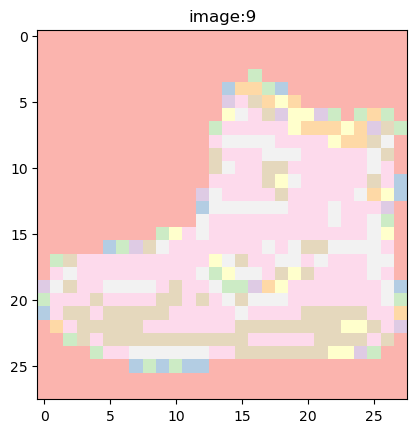

In [85]:
plt.imshow(x[0].reshape(28,28), cmap='Pastel1')
plt.title('image:'+str(y[0]))
plt.show()

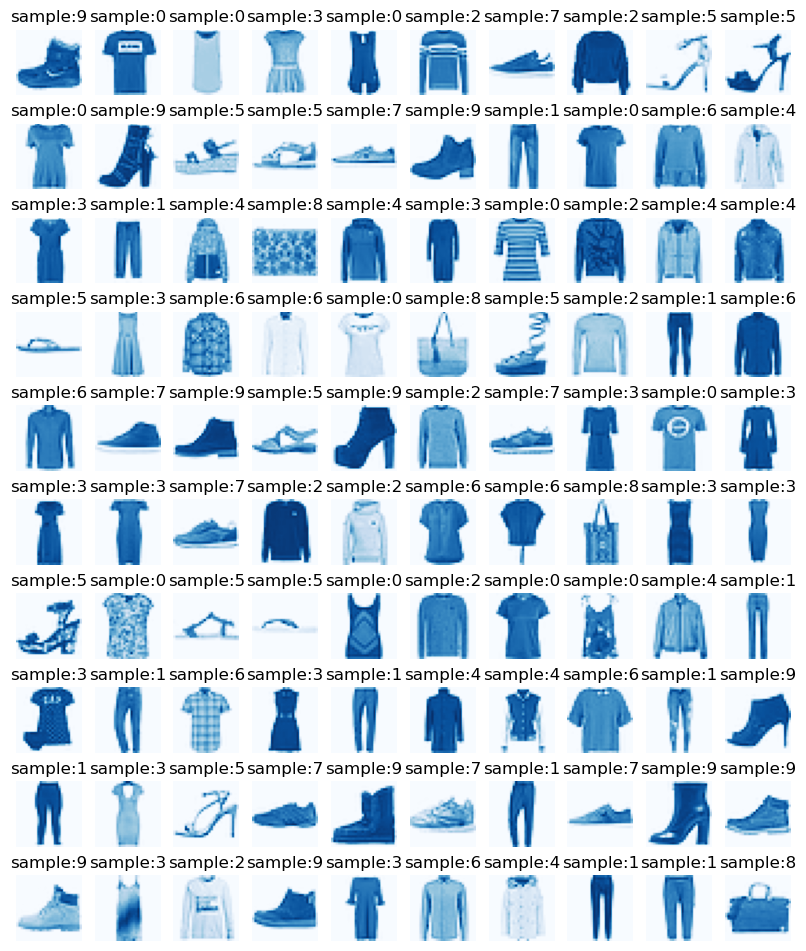

In [86]:
plt.figure(figsize=(10,12))

for i in range(100):
    plt.subplot(10,10, i+1)
    plt.axis('off')
    plt.imshow(x[i].reshape(28,28), cmap='Blues')
    plt.title('sample:%i'%(y[i]))
plt.show()

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=1/7, random_state=0)

In [88]:
X_train=torch.FloatTensor(x_train)
X_test=torch.FloatTensor(x_test)
Y_train=torch.LongTensor(y_train)
Y_test=torch.LongTensor(y_test)

In [89]:
ds_train=TensorDataset(X_train, Y_train)
ds_test=TensorDataset(X_test, Y_test)
load_train=DataLoader(ds_train, batch_size=64, shuffle=True)
load_test=DataLoader(ds_test, batch_size=64, shuffle=True)

In [90]:
model=nn.Sequential()
model.add_module('fc1',nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2',nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3',nn.Linear(100, 100))
model.add_module('relu3', nn.ReLU())
model.add_module('fc4',nn.Linear(100, 10))

In [91]:
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(), lr=0.1)

In [92]:
costs=[]
accuracys=[]
epochs=[]

def train(epoch):
    model.train()
    cost=0
    accuracy=0

    for data, targets, in load_train:
        optimizer.zero_grad()
        output=model(data)
        loss=loss_fn(output, targets)
        
        _, y_hat=torch.max(output.data, 1)# 확률이 가장 높은 레이블이 무엇인지 계산
        accuracy+=y_hat.eq(targets.data.view_as(y_hat)).sum()
        cost+=loss.item()
        loss.backward()

        optimizer.step()

    epochs.append(epoch)
    costs.append(cost)
    accuracys.append(accuracy/60000)
    print(epoch, cost, accuracy/60000)

In [93]:
def test():
    model.eval()
    correct=0

    with torch.no_grad():
        for data, targets in load_test:
            output=model(data)
            _, predicted=torch.max(output, 1)
            correct+=predicted.eq(targets.data.view_as(predicted)).sum()

    data_num=len(load_test.dataset) #총데이터 건수
    print('테스트 데이터에서의 예측 정확도 : ', data_num, 100*correct/data_num)


In [94]:
for epoch in range(20):
    train(epoch)
test()

0 548.3611504137516 tensor(0.7899)
1 374.00320994853973 tensor(0.8555)
2 333.31874692440033 tensor(0.8696)
3 311.6447057649493 tensor(0.8767)
4 293.7068107649684 tensor(0.8832)
5 279.9819729849696 tensor(0.8888)
6 267.42266488820314 tensor(0.8931)
7 256.4886999428272 tensor(0.8986)
8 246.45946557074785 tensor(0.9021)
9 239.77555626630783 tensor(0.9044)
10 231.7564830109477 tensor(0.9074)
11 222.86447808146477 tensor(0.9106)
12 215.03995732218027 tensor(0.9140)
13 209.29994168132544 tensor(0.9154)
14 202.34575736522675 tensor(0.9182)
15 199.13272404298186 tensor(0.9197)
16 191.07941959798336 tensor(0.9222)
17 187.67041290178895 tensor(0.9248)
18 180.33269062265754 tensor(0.9265)
19 178.08072016574442 tensor(0.9286)
테스트 데이터에서의 예측 정확도 :  10000 tensor(88.4000)


예측결과: tensor(6)
정답: tensor(2)


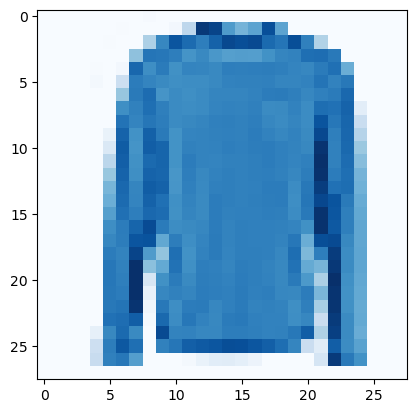

In [95]:
index=5
model.eval()
data=X_test[index]
output=model(data)
_, predicted=torch.max(output.data,0)
print("예측결과:", predicted)
print("정답:", Y_test[5])

X_test_show=(X_test[index].numpy())
plt.imshow(X_test_show.reshape(28,28), cmap='Blues')
plt.show()

In [96]:
predicteds=model(X_test)
predicted_list=[]
#print(predicteds)
for i in range(len(predicteds)):
    v, index=torch.max(predicteds[i],0)
    #print(v)
    #print(index)
    predicted_list.append(index.item())
predicted=torch.from_numpy(np.array(predicted_list))

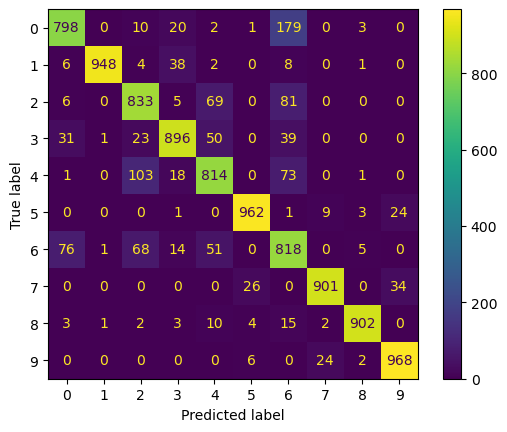

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test, predicted)
ConfusionMatrixDisplay(cm).plot()